<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Часть-1.-Реализация-KNN-с-помощью-numpy" data-toc-modified-id="Часть-1.-Реализация-KNN-с-помощью-numpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Часть 1. Реализация <a href="https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9" rel="nofollow" target="_blank">KNN</a> с помощью numpy</a></span><ul class="toc-item"><li><span><a href="#Метод-К-ближайших-соседей-(K-neariest-neighbor-classifier)" data-toc-modified-id="Метод-К-ближайших-соседей-(K-neariest-neighbor-classifier)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Метод К-ближайших соседей (K-neariest neighbor classifier)</a></span></li><li><span><a href="#Загрузим-и-визуализируем-данные" data-toc-modified-id="Загрузим-и-визуализируем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузим и визуализируем данные</a></span></li><li><span><a href="#Сначала-реализуем-KNN-для-бинарной-классификации" data-toc-modified-id="Сначала-реализуем-KNN-для-бинарной-классификации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Сначала реализуем KNN для бинарной классификации</a></span><ul class="toc-item"><li><span><a href="#Пришло-время-написать-код!" data-toc-modified-id="Пришло-время-написать-код!-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Пришло время написать код!</a></span></li></ul></li><li><span><a href="#Кросс-валидация-(cross-validation)" data-toc-modified-id="Кросс-валидация-(cross-validation)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Кросс-валидация (cross-validation)</a></span><ul class="toc-item"><li><span><a href="#Проверим,-как-хорошо-работает-лучшее-значение-k-на-тестовых-данных-(test-data)" data-toc-modified-id="Проверим,-как-хорошо-работает-лучшее-значение-k-на-тестовых-данных-(test-data)-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)</a></span></li></ul></li><li><span><a href="#Многоклассовая-классификация-(multi-class-classification)" data-toc-modified-id="Многоклассовая-классификация-(multi-class-classification)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Многоклассовая классификация (multi-class classification)</a></span><ul class="toc-item"><li><span><a href="#Финальный-тест---классификация-на-10-классов-на-тестовой-выборке-(test-data)" data-toc-modified-id="Финальный-тест---классификация-на-10-классов-на-тестовой-выборке-(test-data)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Финальный тест - классификация на 10 классов на тестовой выборке (test data)</a></span></li></ul></li></ul></li><li><span><a href="#Часть-2.-Sklearn" data-toc-modified-id="Часть-2.-Sklearn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 2. Sklearn</a></span></li></ul></div>

# Часть 1. Реализация [KNN](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9) с помощью numpy

In [ ]:
# Напоминание про np.newaxis :)

## Метод К-ближайших соседей (K-neariest neighbor classifier)

Вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Перед выполнением задания:
- Положите в текущую директорию (/content/) файлы 'knn.py', 'metrics.py', 'dataset.py', `download_data.sh`. Это можно сделать запуском ячейки с их загрузкой ниже

In [1]:
!curl -L -o 'metrics.py' 'https://drive.google.com/uc?id=1vdWAatgE04qDSi9y-6dJhR293MQQMJkM&export=download&confirm=t'
!curl -L -o 'knn.py' 'https://drive.google.com/uc?id=1V1umd6JN6hxMNnKg9jIRJmp5RkkuEuX2&export=download&confirm=t'
!curl -L -o 'download_data.sh' 'https://drive.google.com/uc?id=1kKJFCKmrAQohhl8GtdJC2WFJvrVGBbq9&export=download&confirm=t'
!curl -L -o 'dataset.py' 'https://drive.google.com/uc?id=1Lt8bCBF4o-sFmz2Lqvw_4YTAqJIvQvv4&export=download&confirm=t'

curl: (3) URL using bad/illegal format or missing URL
"export" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"confirm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
curl: (3) URL using bad/illegal format or missing URL
"export" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"confirm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
curl: (3) URL using bad/illegal format or missing URL
"export" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"confirm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
curl: (3) URL using bad/illegal format or missing URL
"export" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"confirm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«

- запустите файл `download_data.sh`, чтобы скачать в директорию data данные, которые мы будем использовать для тренировки (data появится во время запуска bash-скрипта)

In [2]:
! bash download_data.sh

mkdir: cannot create directory вЂ�dataвЂ™: File exists
--2023-08-12 15:56:28--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2023-08-12 15:56:29--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Reusing existing connection to ufldl.stanford.edu:80.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

In [5]:
plt.style.use('seaborn')

## Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/).

In [6]:
# разбиение данных на обучение и тест
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

# train_X - тренировочные изображения - 1000 шт.
# train_y - тренировочные метки - 1000 шт.
# test_X - тестовые изображения - 100 шт.
# test_y - тестовые метки - 100 шт.

# В качестве проверки работоспособности распечатаю размер обучающих и тестовых данных
# видим, что тренировочная выборка содержит тысячу картинок
# каждая из которых имеет 32 пикселя в ширину
# 32 пикселя в высоту
# и 3 канала RGB

# тестовая выборка содержит сто картинок
print('Training data shape: ', train_X.shape)
print('Training labels shape: ', train_y.shape)
print('Test data shape: ', test_X.shape)
print('Test labels shape: ', test_y.shape)

Training data shape:  (1000, 32, 32, 3)
Training labels shape:  (1000,)
Test data shape:  (100, 32, 32, 3)
Test labels shape:  (100,)


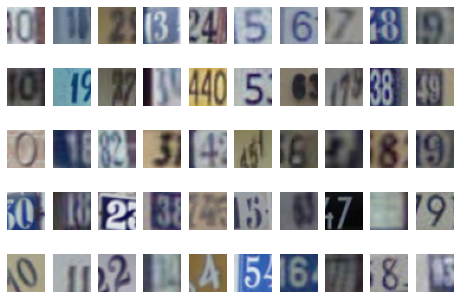

In [8]:
samples_per_class = 5  # Количество образцов на класс для визуализации
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

## Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [9]:
# Для начала подготовим метки и исходные  данные
# Создаем маску, с помощью которой выбираем только 0-ой и 9-ый лейблы
binary_train_mask = (train_y == 0) | (train_y == 9)

# тренировочные данные
binary_train_X = train_X[binary_train_mask]
# тренировочные метки для цифры 0
binary_train_y = train_y[binary_train_mask] == 0

# маска для тестовых данных, выбирающая только 0-ой и 9-ый леблы
binary_test_mask = (test_y == 0) | (test_y == 9)
# тестовые данные
binary_test_X = test_X[binary_test_mask]
# тестовые метки
binary_test_y = test_y[binary_test_mask] == 0


In [10]:
# Преобразуем в одномерный массив [num_samples, 32*32*3]
# вот тут надо разобраться, мне непонятно с этим преобразованием в одномерный массив
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)
# распечатаем, чтобы убедиться, что все корректно работает
print('Binary train shape: ', binary_train_X.shape)
print('Binary_test shape: ', binary_test_X.shape)

Binary train shape:  (121, 3072)
Binary_test shape:  (16, 3072)


In [11]:
# Создаем классификатор и вызываем .fit() для тренировки модели
# KNN просто запоминает все данные
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

### Пришло время написать код!

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

![](https://miro.medium.com/max/1400/0*cjh3izgm5Ldt62_S.png)

[Статья помогла разобраться с тем, что от меня хотят](https://konstantinklepikov.github.io/2019/05/22/cs2131n-knn.html)

In [12]:
# TODO: реализуйте метод compute_distances_two_loops класса KNN в файле knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [13]:
# TODO: реализуйте метод compute_distances_one_loop класса KNN в файле knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


[Нахождение расстояния Манхеттена только с помощью Numpy](https://ru.stackoverflow.com/questions/1365913/%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82-%D0%BC%D0%B0%D0%BD%D1%85%D1%8D%D1%82%D1%82%D0%B5%D0%BD%D1%81%D0%BA%D0%BE%D0%B5-%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5-%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F-numpy)

In [14]:
# TODO: реализуйте метод compute_distances_no_loops класса KNN в файле knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
print(dists[0, 10])
print(np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


205633.0
205633.0


In [15]:
# Посмотрим на разницу
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

20.1 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.9 ms ± 475 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.8 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
# TODO: реализуйте метод predict_labels_binary класса KNN в файле knn.py
prediction = knn_classifier.predict(binary_test_X)

In [17]:
# TODO: реализуйте функцию binary_classification_metrics в файле metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

KNN with k = 1
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


In [18]:
# Создадим экземпляр класса KNN с k=3 и посчитаем метрики
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

KNN with k = 3
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


## Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN!

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). 

Мы разделим тренировочные данные на 5 фолдов (folds), 

и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), 

а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

In [19]:
from sklearn.model_selection import KFold
from metrics import binary_classification_metrics

num_folds = 5
kf = KFold(n_splits=num_folds)

# Создание пустых списков для хранения данных фолдов
train_folds_X = []
train_folds_y = []

# разделение данных на фолды train_folds_X and train_folds_y
for train_index, _ in kf.split(binary_train_X):
    train_folds_X.append(binary_train_X[train_index])
    train_folds_y.append(binary_train_y[train_index])
    
# список для подбора лучшего значения соседей
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]

# Словарь для сопоставления значений k со средними баллами F1
k_to_f1 = {} 

for k in k_choices:
    # список для франения F1 для каждого фолда
    f1_scores = []  
    
    for fold in range(num_folds):
        # Подготовка данных обучения для проверки текущего фолда
        train_X = np.concatenate([train_folds_X[i] for i in range(num_folds) if i != fold])
        train_y = np.concatenate([train_folds_y[i] for i in range(num_folds) if i != fold])
        val_X = train_folds_X[fold]
        val_y = train_folds_y[fold]
        
        # Создание и обучение Экземпляра KNN с текущим значением k
        knn_classifier = KNN(k=k)
        knn_classifier.fit(train_X, train_y)
        
        # предсказание
        predictions = knn_classifier.predict(val_X)
        
        # Подсчет F1 метрики для текущего фолда
        _, _, f1, _ = binary_classification_metrics(predictions, val_y)
        # добавление метрики в список
        f1_scores.append(f1)
    
    # Рассчитать среднего F1 для текущего значения k
    avg_f1 = np.mean(f1_scores)
    # добавление в список
    k_to_f1[k] = avg_f1

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 1.000000
k = 2, f1 = 1.000000
k = 3, f1 = 1.000000
k = 5, f1 = 1.000000
k = 8, f1 = 0.819873
k = 10, f1 = 0.829935
k = 15, f1 = 0.780282
k = 20, f1 = 0.741680
k = 25, f1 = 0.722254
k = 50, f1 = 0.697570


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [40]:
# TODO Установите значение best_k на лучшее значение кросс-валидации
best_k = 8

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

Best KNN with k = 8
Accuracy: 0.62, Precision: 0.71, Recall: 0.83, F1: 0.77


## Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [23]:
# Теперь воспользуемся всеми 10 классами
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [24]:
# TODO: Реализуйте метод predict_labels_multiclass класса KNN в файле knn.py
predict = knn_classifier.predict(test_X)

In [35]:
# TODO: Реализуйте функцию multiclass_accuracy в файле metrics.py
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.12


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [27]:
from sklearn.model_selection import KFold
from metrics import multiclass_accuracy

num_folds = 5
kf = KFold(n_splits=num_folds)

# Создание пустых списков для хранения данных фолдов
train_folds_X = []
train_folds_y = []

# разделение данных на фолды train_folds_X and train_folds_y
for train_index, _ in kf.split(train_X):
    train_folds_X.append(train_X[train_index])
    train_folds_y.append(train_y[train_index])

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}  # Dictionary to map k values to average accuracies

for k in k_choices:
    accuracy_scores = []  # Список для хранения оценок точности для каждого фолда
    
    for fold in range(num_folds):
        # Подготовка данных обучения для проверки текущего фолда
        train_X_fold = np.concatenate([train_folds_X[i] for i in range(num_folds) if i != fold])
        train_y_fold = np.concatenate([train_folds_y[i] for i in range(num_folds) if i != fold])
        val_X_fold = train_folds_X[fold]
        val_y_fold = train_folds_y[fold]
        
        # Создание и обучение Экземпляра KNN с текущим значением k
        knn_classifier = KNN(k=k)
        knn_classifier.fit(train_X_fold, train_y_fold)
        
        # предсказание
        predictions = knn_classifier.predict(val_X_fold)
        
        # Расчет точности фолда
        accuracy = multiclass_accuracy(predictions, val_y_fold)
        # добавление в список
        accuracy_scores.append(accuracy)
    
    # Усредняем F1 по всем фолдам
    avg_accuracy = np.mean(accuracy_scores)
    # записываем в словарь
    k_to_accuracy[k] = avg_accuracy

for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

k = 1, accuracy = 1.000000
k = 2, accuracy = 1.000000
k = 3, accuracy = 1.000000
k = 5, accuracy = 1.000000
k = 8, accuracy = 1.000000
k = 10, accuracy = 1.000000
k = 15, accuracy = 1.000000
k = 20, accuracy = 0.808160
k = 25, accuracy = 0.817188
k = 50, accuracy = 0.719645


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [61]:
# TODO Установите значение best_k на лучшее значение кросс-валидации
best_k = 1

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy должна быть около 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.12


# Часть 2. Sklearn

Проделайте шаги **многоклассовой** классификации с помощью библиотеки sklearn! Но чтобы не перебирать гиперпараметры вручную, рекомендую посмотреть документацию по такому объекту как GridSearchCV.

In [49]:
# импорт необходимых библиотек
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# определение параметров для поиска
param_grid = {'n_neighbors': [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]}

In [57]:
# Создание объекта классификатора
knn_classifier = KNeighborsClassifier()
# Создание объекта GridSearchCV с использованием классификатора и параметров для поиска
grid_search = GridSearchCV(knn_classifier, param_grid, cv=num_folds, scoring='f1_micro')

In [58]:
# обучение grid_search
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]},
             scoring='f1_micro')

In [59]:
# получение лучших параметров
best_params = grid_search.best_params_
# получение лучшей метрики
best_f1 = grid_search.best_score_
print("Best parameters:", best_params)
print("Best F1 score:", best_f1)

Best parameters: {'n_neighbors': 1}
Best F1 score: 1.0
